你可以從
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)
訂購《Think Python 3e》的實體書和電子書版本。

In [59]:
from os.path import basename, exists

In [60]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("已下載 " + str(local)) # 譯註：這裡顯示下載完成的檔案路徑
    return filename

In [61]:
download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

In [62]:
import thinkpython

# 函式 (Functions)

在上一章，我們用了一些 Python 提供的函式，像是 `int` 和 `float`，還有一些 `math` 模組提供的函式，像是 `sqrt` 和 `pow`。
在這一章，你會學到如何建立自己的函式並執行它們。
我們也會看到一個函式如何呼叫另一個函式。
作為範例，我們會顯示蒙提·派森 (Monty Python) 歌曲的歌詞。
這些看起來傻傻的例子其實展示了一個很重要的特性——能夠寫自己的函式是程式設計的基礎。

這一章也會介紹一個新的陳述句，`for` 迴圈，它用來重複執行某個運算。

## 定義新的函式

**函式定義** (function definition) 指定了一個新函式的名稱以及當函式被呼叫時要執行的陳述句序列。這裡有個例子：

In [63]:
def print_lyrics(): # 譯註：定義一個叫做 print_lyrics 的函式
    print("我是一個伐木工，我過得很好。") # 譯註：歌詞改為中文
    print("我整夜睡覺，整天工作。")

`def` 是一個關鍵字，表示這是一個函式定義。
函式的名稱是 `print_lyrics`。
任何合法的變數名稱也都是合法的函式名稱。

名稱後面的空括號表示這個函式不接受任何引數。

函式定義的第一行叫做 **標頭** (header)——其餘的部分叫做 **主體** (body)。
標頭必須以冒號結尾，而主體必須縮排。依照慣例，縮排通常是四個空格。
這個函式的主體是兩個 print 陳述句；一般來說，函式的主體可以包含任意數量、任意種類的陳述句。

定義一個函式會建立一個 **函式物件** (function object)，我們可以像這樣顯示它。

In [64]:
print_lyrics

<function __main__.print_lyrics()>

輸出結果顯示 `print_lyrics` 是一個不接受任何引數的函式。
`__main__` 是包含 `print_lyrics` 的模組的名稱。(譯註：在直接執行 .py 檔案或 Jupyter Notebook 中，最外層的程式碼通常屬於 `__main__` 模組)

現在我們已經定義了一個函式，我們可以用和呼叫內建函式相同的方式來呼叫它。

In [65]:
print_lyrics()

我是一個伐木工，我過得很好。
我整夜睡覺，整天工作。


當函式執行時，它會執行主體中的陳述句，也就是顯示「伐木工之歌」的前兩行歌詞。

## 參數 (Parameters)

我們看過的一些函式需要引數；例如，當你呼叫 `abs` 時，你會傳入一個數字作為引數。
有些函式需要多於一個引數；例如，`math.pow` 需要兩個，底數和指數。

這裡是一個接受引數的函式定義。

In [66]:
def print_twice(string): # 譯註：string 是一個參數
    print(string)
    print(string)

括號中的變數名稱是一個 **參數** (parameter)。
當函式被呼叫時，引數的值會被賦予給參數。
例如，我們可以像這樣呼叫 `print_twice`。

In [67]:
print_twice('丹尼斯·摩爾，') # 譯註：歌詞改為中文

丹尼斯·摩爾，
丹尼斯·摩爾，


執行這個函式，效果等同於將引數賦值給參數，然後執行函式的主體，就像這樣：

In [68]:
string = '丹尼斯·摩爾，'
print(string)
print(string)

丹尼斯·摩爾，
丹尼斯·摩爾，


你也可以使用一個變數作為引數。

In [69]:
line = '丹尼斯·摩爾，'
print_twice(line)

丹尼斯·摩爾，
丹尼斯·摩爾，


在這個例子中，`line` 的值被賦予給參數 `string`。

## 呼叫函式

一旦你定義了一個函式，你就可以在另一個函式內部使用它。
為了示範，我們會寫一些函式來印出「午餐肉之歌」(The Spam Song) 的歌詞 (<https://www.songfacts.com/lyrics/monty-python/the-spam-song>)。

> Spam, Spam, Spam, Spam,  (午餐肉, 午餐肉, 午餐肉, 午餐肉,)
> Spam, Spam, Spam, Spam,  (午餐肉, 午餐肉, 午餐肉, 午餐肉,)
> Spam, Spam,              (午餐肉, 午餐肉,)
> (Lovely Spam, Wonderful Spam!) (可愛的午餐肉，美妙的午餐肉!)
> Spam, Spam,              (午餐肉, 午餐肉,)

我們會從下面這個函式開始，它接受兩個參數。


In [70]:
def repeat(word, n): # 譯註：word 是要重複的字，n 是重複次數
    print(word * n) # 譯註：字串乘以整數 n，會將字串重複 n 次

我們可以用這個函式來印出歌曲的第一行，像這樣。

In [71]:
spam = '午餐肉，' # 譯註：改為中文
repeat(spam, 14)

午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，午餐肉，


要顯示前兩行，我們可以定義一個新的函式，它會使用 `repeat`。

In [72]:
def first_two_lines():
    repeat(spam, 4)
    repeat(spam, 4)

然後像這樣呼叫它。

In [73]:
first_two_lines()

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，


要顯示最後三行，我們可以定義另一個函式，它也會使用 `repeat`。

In [74]:
def last_three_lines():
    repeat(spam, 2)
    print('(可愛的午餐肉，美妙的午餐肉！)') # 譯註：改為中文
    repeat(spam, 2)

In [75]:
last_three_lines()

午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，


最後，我們可以把它們全部組合起來，用一個函式印出整段歌詞。

In [76]:
def print_verse():
    first_two_lines()
    last_three_lines()

In [77]:
print_verse()

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，


當我們執行 `print_verse` 時，它會呼叫 `first_two_lines`，而 `first_two_lines` 會呼叫 `repeat`，`repeat` 又會呼叫 `print`。
這是一連串的函式呼叫。

當然，我們可以用更少的函式來做同樣的事情，但這個例子的重點是展示函式之間如何協同工作。

## 重複 (Repetition)

如果我們想顯示不只一段歌詞，我們可以使用 `for` 陳述句。
這裡有一個簡單的例子。

In [78]:
for i in range(2): # 譯註：range(2) 會產生 0 和 1
    print(i)

0
1


第一行是標頭，以冒號結尾。
第二行是主體，必須縮排。

標頭以關鍵字 `for` 開始，接著是一個新的變數名稱 `i`，然後是另一個關鍵字 `in`。
它使用 `range` 函式來建立一個包含兩個值的序列，也就是 `0` 和 `1`。
在 Python 中，當我們開始計數時，通常從 `0` 開始。

當 `for` 陳述句執行時，它會將 `range` 產生的第一個值賦予給 `i`，然後執行主體中的 `print` 函式，顯示 `0`。

當它執行到主體的結尾時，它會回到標頭，這就是為什麼這個陳述句叫做 **迴圈** (loop)。
第二次進入迴圈時，它會將 `range` 產生的下一個值賦予給 `i`，並顯示它。
然後，因為那是 `range` 產生的最後一個值，迴圈結束。

這裡是如何使用 `for` 迴圈來印出歌曲的兩段歌詞。

In [86]:
for i in range(3):
    print("第", i+1, "段") # 譯註：讓段落從 1 開始計數，並改為中文
    print_verse()
    print() # 譯註：印一個空行，讓段落之間有間隔

第 1 段
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，

第 2 段
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，

第 3 段
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，



你可以把 `for` 迴圈放在函式裡面。
例如，`print_n_verses` 接受一個名為 `n` 的參數，它必須是一個整數，然後顯示指定數量的歌詞段落。

In [87]:
def print_n_verses(n):
    for i in range(n):
        print_verse()
        print()

In [81]:
print_n_verses(5)

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，

午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，午餐肉，午餐肉，
午餐肉，午餐肉，
(可愛的午餐肉，美妙的午餐肉！)
午餐肉，午餐肉，



在這個例子中，我們沒有在迴圈主體中使用 `i`，但標頭中仍然需要一個變數名稱。

## 變數和參數是區域性的 (Local)

當你在函式內部建立一個變數時，它是 **區域性的** (local)，這
意味著它只存在於該函式內部。
例如，下面的函式接受兩個引數，將它們串接起來，然後印出結果兩次。

In [82]:
def cat_twice(part1, part2):
    cat = part1 + part2 # 譯註：cat 是在 cat_twice 函式內定義的區域變數
    print_twice(cat)

這裡有一個使用它的例子：

In [83]:
line1 = '永遠要看事情的 ' # 譯註：歌詞改為中文
line2 = '光明面。'
cat_twice(line1, line2)

永遠要看事情的 光明面。
永遠要看事情的 光明面。


當 `cat_twice` 執行時，它會建立一個名為 `cat` 的區域變數，這個變數在函式結束時會被銷毀。
如果我們試圖顯示它，會得到一個 `NameError` (名稱錯誤)：

In [84]:
get_ipython().run_cell_magic('expect', 'NameError', '\nprint(cat)\n') # 譯註：預期 NameError，因為 cat 在函式外部未定義

NameError: name 'cat' is not defined

In [85]:
print(cat)

NameError: name 'cat' is not defined

在函式外部，`cat` 是未定義的。

參數也是區域性的。
例如，在 `cat_twice` 函式外部，不存在 `part1` 或 `part2` 這樣的東西。

## 堆疊圖 (Stack diagrams)

為了追蹤哪些變數可以在哪裡使用，有時候畫一個 **堆疊圖** (stack diagram) 會很有用。
就像狀態圖一樣，堆疊圖顯示每個變數的值，但它們也顯示每個變數屬於哪個函式。

每個函式都由一個 **框架** (frame) 表示。
框架是一個盒子，外面有函式的名稱，裡面有函式的參數和區域變數。

這是上一個例子的堆疊圖。

In [89]:
from diagram import make_frame, Stack # 譯註：這是書中用來畫圖的工具

In [90]:
# 譯註：以下程式碼是為了產生一個函式呼叫堆疊的示意圖
d1 = dict(line1=line1, line2=line2)
frame1 = make_frame(d1, name='__main__', dy=-0.3, loc='left') # 最外層的框架

In [91]:
d2 = dict(part1=line1, part2=line2, cat=line1+line2)
frame2 = make_frame(d2, name='cat_twice', dy=-0.3,
                    offsetx=0.03, loc='left') # cat_twice 函式的框架

In [92]:
d3 = dict(string=line1+line2)
frame3 = make_frame(d3, name='print_twice',
                    offsetx=0.04, offsety=-0.3, loc='left') # print_twice 函式的框架

In [93]:
d4 = {"?": line1+line2} # 譯註：print 函式的參數名稱未知，用 ? 表示
frame4 = make_frame(d4, name='print',
                    offsetx=-0.22, offsety=0, loc='left') # print 函式的框架

In [94]:
stack = Stack([frame1, frame2, frame3, frame4], dy=-0.8)

In [95]:
from diagram import diagram, adjust # 譯註：這是書中用來畫圖的工具

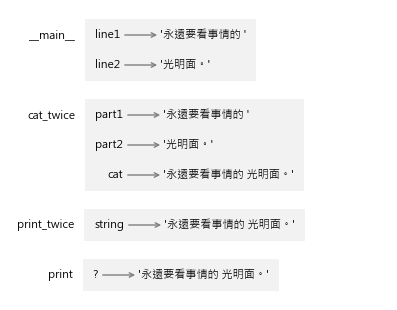

In [96]:
width, height, x, y = [3.77, 2.9, 1.1, 2.65] # 譯註：圖表的繪製參數
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox) # 譯註：調整圖表位置的函式，這裡被註解掉了


已設定使用 Microsoft JhengHei 字體


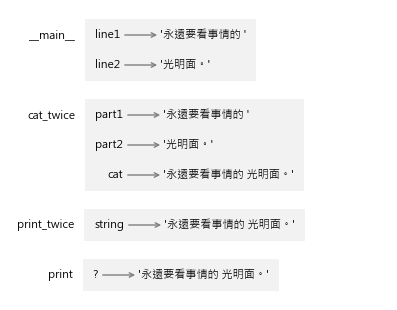

In [97]:
# 在繪圖代碼之前添加
from set_chinese_font import set_chinese_font, list_available_chinese_fonts

# 設定中文字體
set_chinese_font()

# 然後再執行您的繪圖代碼
width, height, x, y = [3.77, 2.9, 1.1, 2.65]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)

In [99]:
import matplotlib.pyplot as plt
plt.savefig('chap03_stack_diagram.png', dpi=300) # 譯註：將圖表儲存為圖片

<Figure size 640x480 with 0 Axes>

框架以堆疊方式排列，顯示哪個函式呼叫了哪個函式，依此類推。從底部往上看，`print` 被 `print_twice` 呼叫，`print_twice` 被 `cat_twice` 呼叫，而 `cat_twice` 被 `__main__` 呼叫——`__main__` 是最頂層框架的特殊名稱。
當你在任何函式之外建立變數時，它屬於 `__main__`。

在 `print` 的框架中，問號表示我們不知道參數的名稱。
如果你好奇，可以問虛擬助理：「Python print 函式的參數是什麼？」

## 回溯追蹤 (Tracebacks)

當函式中發生執行期錯誤時，Python 會顯示正在執行的函式名稱、呼叫它的函式名稱，依此類推，一直往上追溯堆疊。
為了看一個例子，我會定義一個包含錯誤的 `print_twice` 版本——它試圖印出 `cat`，而 `cat` 是另一個函式中的區域變數。

In [100]:
def print_twice(string): # 譯註：這是故意寫錯的版本
    print(cat)            # NameError: cat 在這個函式中未定義
    print(cat)

現在看看當我們執行 `cat_twice` 時會發生什麼。

這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊，
包括回溯追蹤。

In [ ]:
get_ipython().run_line_magic('xmode', 'Verbose') # 譯註：開啟詳細錯誤回報模式

In [ ]:
get_ipython().run_cell_magic('expect', 'NameError', '\ncat_twice(line1, line2)\n') # 譯註：預期 NameError

錯誤訊息包含一個 **回溯追蹤** (traceback)，它顯示錯誤發生時正在執行的函式、呼叫它的函式，依此類推。
在這個例子中，它顯示 `cat_twice` 呼叫了 `print_twice`，而錯誤發生在 `print_twice` 中。

回溯追蹤中函式的順序與堆疊圖中框架的順序相同。
正在執行的函式在最底部。

## 為什麼要用函式？

現在可能還不太清楚為什麼要把程式分成函式這麼麻煩。
有幾個原因：

-   建立一個新函式讓你有機會為一組陳述句命名，這讓你的程式更容易閱讀和除錯。

-   函式可以透過消除重複的程式碼來讓程式更小。
    之後，如果你要做修改，你只需要在一個地方修改。

-   將一個長程式分成多個函式，可以讓你一次只除錯一部分，然後再把它們組合成一個可運作的整體。

-   設計良好的函式通常可以用於許多程式。一旦你編寫並除錯了一個函式，你就可以重複使用它。

## 除錯 (Debugging)

除錯可能令人沮喪，但它也富有挑戰性、有趣，有時甚至好玩。
而且它是你能學到的最重要的技能之一。

在某些方面，除錯就像偵探工作。
你會得到一些線索，然後你必須推斷出導致你看到的結果的事件。

除錯也像實驗科學。
一旦你對問題出在哪裡有了想法，你就修改你的程式然後再試一次。
如果你的假設是正確的，你就能預測修改的結果，你就離一個可運作的程式更近了一步。
如果你的假設是錯誤的，你就必須想出一個新的假設。

對某些人來說，程式設計和除錯是同一件事；也就是說，程式設計就是逐步除錯一個程式，直到它能做你想做的事。
想法是，你應該從一個可運作的程式開始，然後做一些小的修改，邊做邊除錯。

如果你發現自己花了很多時間在除錯，那通常表示你在開始測試之前寫了太多程式碼。
如果你採取更小的步驟，你可能會發現進度反而更快。

## 詞彙表

**函式定義 (function definition):**
一個建立函式的陳述句。

**標頭 (header):**
 函式定義的第一行。

**主體 (body):**
 函式定義內部的陳述句序列。

**函式物件 (function object):**
由函式定義建立的值。
函式的名稱是一個指向函式物件的變數。

**參數 (parameter):**
 在函式內部用來指向傳入引數值的名稱。

**迴圈 (loop):**
 一個執行一個或多個陳述句的陳述句，通常會重複執行。

**區域變數 (local variable):**
在函式內部定義的變數，只能在該函式內部存取。

**堆疊圖 (stack diagram):**
一種圖形表示法，用來呈現函式呼叫的堆疊、它們的變數以及這些變數所指向的值。

**框架 (frame):**
 堆疊圖中的一個盒子，代表一次函式呼叫。
 它包含函式的區域變數和參數。

**回溯追蹤 (traceback):**
 當例外發生時，印出正在執行的函式列表。

## 練習

這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊。
在做練習之前先執行它。

In [ ]:
get_ipython().run_line_magic('xmode', 'Verbose')

### 問問虛擬助理

函式或 `for` 迴圈中的陳述句，依照慣例，會縮排四個空格。
但並非所有人都同意這個慣例。
如果你對這場大辯論的歷史感到好奇，可以問虛擬助理「告訴我關於 Python 中的空格和定位字元（tabs）」。

虛擬助理在編寫小型函式方面相當不錯。

1. 請你最喜歡的虛擬助理「寫一個叫做 repeat 的函式，它接受一個字串和一個整數，然後將該字串印出指定的次數。」

2. 如果結果使用了 `for` 迴圈，你可以問：「你能在不用 `for` 迴圈的情況下做到嗎？」

3. 從本章中挑選任何其他函式，請虛擬助理編寫它。挑戰在於要足夠精確地描述函式才能得到你想要的結果。使用你在本書到目前為止學到的詞彙。

虛擬助理在除錯函式方面也相當不錯。

1. 問虛擬助理這個版本的 `print_twice` 有什麼問題。

    ```python
    def print_twice(string):
        print(cat)
        print(cat)
    ```

如果你在下面的任何練習中遇到困難，可以考慮向虛擬助理尋求協助。

### 練習

寫一個名為 `print_right` 的函式，它接受一個名為 `text` 的字串作為參數，並印出該字串，使其前面有足夠的空格，讓字串的最後一個字母位於顯示的第 40 欄。

In [ ]:
def print_right(text):
    print(' '*40+text)

解答

In [ ]:
def print_right(text):
    """將文字印出，使其最後一個字母位於第 40 欄。
    
    text: 字串
    """
    columns = 100 # 譯註：目標欄位寬度
    space = '^'
    num_spaces = columns - len(text) # 譯註：計算需要多少個前導空格
    print(space * num_spaces + text) # 譯註：印出空格加上文字

In [ ]:
print_right('Hello I am a programmer') # 譯註：印出對齊的文字


提示：使用 `len` 函式、字串串接運算子 (`+`) 和字串重複運算子 (`*`)。

這裡有一個例子，展示它應該如何運作。

In [ ]:
print_right("蒙提") # 譯註：改為中文
print_right("派森的")
print_right("飛行馬戲團")

### 練習

寫一个叫做 `triangle` 的函式，它接受一个字串和一个整数，并画出一个给定高度的金字塔，该金字塔由字串的副本组成。这是一个高度为 `5` 层的金字塔示例，使用字串 `'L'`。

In [ ]:
def triangle(string, height):
    
    for i in range(height + 1): # 譯註：range(height+1) 會產生 0 到 height 的數字
        space = ' ' * (height - i)
        print(space + string * i)     # 譯註：第 i 行印出 i 個 string (i 從 0 開始)

triangle('L',18)

解答

In [ ]:
def triangle(string, height):
    """透過重複印出字串來製作三角形狀。
    
    string: 要重複的字元
    height: 三角形的行數
    """
    for i in range(height + 1): # 譯註：range(height+1) 會產生 0 到 height 的數字
        print(string * i)     # 譯註：第 i 行印出 i 個 string (i 從 0 開始)

In [ ]:
triangle('L', 5)

### 練習

寫一個叫做 `rectangle` 的函式，它接受一個字串和兩個整數，並畫出一個給定寬度和高度的矩形，該矩形由字串的副本組成。這是一個寬度為 `5`、高度為 `4` 的矩形示例，由字串 `'H'` 組成。

解答

In [ ]:
def rectangle(string, width, height):
    """透過重複印出字串來製作矩形。
    
    string: 要重複的字元
    width: 每行重複的次數
    height: 行數
    """
    for i in range(height): # 譯註：重複 height 次
        print(string * width) # 譯註：每行印出 width 個 string

In [ ]:
rectangle('H', 5, 4)

### 練習

歌曲「99 瓶啤酒」以下列這段歌詞開始：

> 牆上有 99 瓶啤酒 (99 bottles of beer on the wall)
> 99 瓶啤酒 (99 bottles of beer)
> 拿下一瓶，傳下去 (Take one down, pass it around)
> 牆上還有 98 瓶啤酒 (98 bottles of beer on the wall)

然後第二段歌詞相同，只是它從 98 瓶開始，到 97 瓶結束。這首歌會一直持續——持續非常久——直到牆上沒有啤酒為止。

寫一個叫做 `bottle_verse` 的函式，它接受一個數字作為參數，並顯示以該數字瓶數開始的那段歌詞。

提示：考慮從一個可以印出歌詞第一行、第二行或最後一行的函式開始，然後用它來寫 `bottle_verse`。

解答

In [ ]:
def bottle_line(n, suffix):
    """顯示「99 瓶啤酒」中的一行歌詞。
    
    n: 整數，瓶子數量
    suffix: 字串，行尾的補充文字 (例如 "on the wall" 或空字串)
    """
    print(n, '瓶啤酒', suffix) # 譯註：改為中文

In [ ]:
bottle_line(99, '在牆上') # 譯註：顯示「99 瓶啤酒在牆上」

解答

In [ ]:
def bottle_verse(n):
    """顯示「99 瓶啤酒」中的一段歌詞。
    
    n: 整數，這段歌詞開始時的瓶子數量
    """
    bottle_line(n, '在牆上') # 譯註：改為中文
    bottle_line(n, '')
    print('拿下一瓶，傳下去') # 譯註：改為中文
    bottle_line(n-1, '在牆上')
    print()

使用這個函式呼叫來顯示第一段歌詞。

In [ ]:
bottle_verse(99)

如果你想印出整首歌，你可以使用這個 `for` 迴圈，它會從 `99` 倒數到 `1`。
你不需要完全理解這個例子——我們稍後會學到更多關於 `for` 迴圈和 `range` 函式的知識。

In [ ]:
for n in range(6, 0, -1): # 譯註：range(99, 0, -1) 會從 99 倒數到 1 (不包含 0)，每次減 1
    bottle_verse(n)

In[ ]:

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

程式碼授權: [MIT License](https://mit-license.org/)

文字授權: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)